In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

In [43]:
#O arquivo utilizado foi baixado do site www.football-data.co.uk, que agrega informações de diversos campeonatos
#ao redor do mundo.
data = pd.read_csv('BRA.csv', delimiter = ',')
data['Res'] = data['Res'].apply(lambda x: 0 if x == 'D' else (1 if x == 'H' else 2))
data['AG'] = data['AG'].fillna(0)
data['HG'] = data['HG'].fillna(0)
data['AG'].astype(int)
data['HG'].astype(int)
data.info()
# display(data.head())
#Notes for football data

#Country = país do campeonato
#League = nome da liga
#game_id = id do jogo
#Season = temporada
#date = data do jogo
#Time = hora do jogo
#Home = Time da casa
#home_id = id do time da casa
#Away = time visitante
#Away_id =  id do time visitante
#HG = Gols do time da casa
#AG = Gols do time visitante
#Res = Resultado do jogo (D=Draw, H=Home win, A=Away win)
#PH = probablidade vitória time da casa provida pela Pinacle (casa de aposta inglesa)
#PD = probablidade empate provida pela Pinacle (casa de aposta inglesa)
#PA = probablidade vitória time visitante provida pela Pinacle (casa de aposta inglesa)
#MaxH = probablidade vitória time da casa provida pela OddsPortal (casa de aposta inglesa)
#MaxD = probablidade empate provida pela OddsPortal (casa de aposta inglesa)
#MaxA = probablidade vitória time visitante provida pela OddsPortal (casa de aposta ingles
#AvgH = probablidade média de vitória em casa provida pela OddsPortal (casa de aposta inglesa)
#AvgD = probablidade média de empate provida pela OddsPortal (casa de aposta inglesa)
#AvgA = probablidade média de vitória pelo time visitante provida pela OddsPortal (casa de aposta inglesa)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4109 non-null   object 
 1   League   4109 non-null   object 
 2   Season   4109 non-null   int64  
 3   Date     4109 non-null   object 
 4   Time     4109 non-null   object 
 5   Home     4109 non-null   object 
 6   Away     4109 non-null   object 
 7   HG       4109 non-null   float64
 8   AG       4109 non-null   float64
 9   Res      4109 non-null   int64  
 10  PH       4108 non-null   float64
 11  PD       4108 non-null   float64
 12  PA       4108 non-null   float64
 13  MaxH     4109 non-null   float64
 14  MaxD     4109 non-null   float64
 15  MaxA     4109 non-null   float64
 16  AvgH     4109 non-null   float64
 17  AvgD     4109 non-null   float64
 18  AvgA     4109 non-null   float64
dtypes: float64(11), int64(2), object(6)
memory usage: 610.1+ KB


In [33]:
matches = data.shape[0]

features = data.shape[1] -1 #Retirando a coluna Resultado

home_win = len(data[data.Res==1])
away_win = len(data[data.Res==2])
draw = len(data[data.Res==0])
val=[home_win,away_win,draw]

win_rate = (float(home_win)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos ganhos em casa: ', home_win)
print ('Total de jogos ganhos pelo visitante: ', away_win)
print ('Total de jogos empatados: ', draw)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))


Total de jogos:  4109
Total de colunas:  18
Total de jogos ganhos em casa:  2001
Total de jogos ganhos pelo visitante:  994
Total de jogos empatados:  1114
Percentual de jogos ganhos em casa: 48.70%


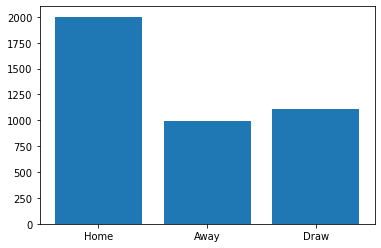

In [12]:
#Visualizando os dados

x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Home', 'Away', 'Draw'))
plt.show()

In [34]:
#Preparando os dados


#Deixar somente as variáveis numericas 
num_data = data.drop(['Country','League','Season','Date','Time','Home','Away'],1)

display(num_data.head())


C:\Users\otavi\AppData\Local\Temp\ipykernel_5808\2694302212.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  num_data = data.drop(['Country','League','Season','Date','Time','Home','Away'],1)


,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [37]:
#separa as features 
features = num_data.drop(['Res'],1)


#separa as labels
labels = num_data['Res']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
    HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89
Labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


C:\Users\otavi\AppData\Local\Temp\ipykernel_5808\1752638190.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = num_data.drop(['Res'],1)


In [60]:
#Escoolhendo as melhores features com Kbest
# features = features.reset_index()

features_list = ('HG','AG','PH','PD','PA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)

ValueError: Found input variables with inconsistent numbers of samples: [4108, 4109]